In [1]:
import pandas as pd
from data_cleaning import rows_to_remove
from data_cleaning import print_missing
from data_cleaning import plot_heatmap

In [3]:
df = pd.read_csv("speed_price_att.csv")

df.head()

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,...,fastest_speed_price,fn,redlining_grade,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.745179,-86.606806,10890007022,1650310200,AT&T,0.768,...,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747563,-86.607140,10890007022,1650310229,AT&T,5.000,...,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.746504,-86.605884,10890007022,1650310203,AT&T,0.768,...,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747759,-86.607675,10890007022,1650310195,AT&T,5.000,...,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.748585,-86.605223,10890007022,1650310196,AT&T,300.000,...,180.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.090069,4.0,35091.0,0.527881,21667


In [5]:
len(df)

432303

In [4]:
print(df.columns)

Index(['address_full', 'incorporated_place', 'major_city', 'state', 'lat',
       'lon', 'block_group', 'collection_datetime', 'provider', 'speed_down',
       'speed_up', 'speed_unit', 'price', 'technology', 'package',
       'fastest_speed_down', 'fastest_speed_price', 'fn', 'redlining_grade',
       'race_perc_non_white', 'income_lmi', 'ppl_per_sq_mile', 'n_providers',
       'income_dollars_below_median', 'internet_perc_broadband',
       'median_household_income'],
      dtype='object')


In [4]:
df = pd.read_csv("cleaned.csv")
print("old columns")
print(df.columns)
# df.drop('Unnamed: 0',axis = 1, inplace=True)

print("new columns")
print(df.columns)

old columns
Index(['major_city', 'state', 'lat', 'lon', 'technology',
       'race_perc_non_white', 'ppl_per_sq_mile', 'n_providers',
       'internet_perc_broadband', 'median_household_income',
       'city_household_income', 'deal'],
      dtype='object')
new columns
Index(['major_city', 'state', 'lat', 'lon', 'technology',
       'race_perc_non_white', 'ppl_per_sq_mile', 'n_providers',
       'internet_perc_broadband', 'median_household_income',
       'city_household_income', 'deal'],
      dtype='object')


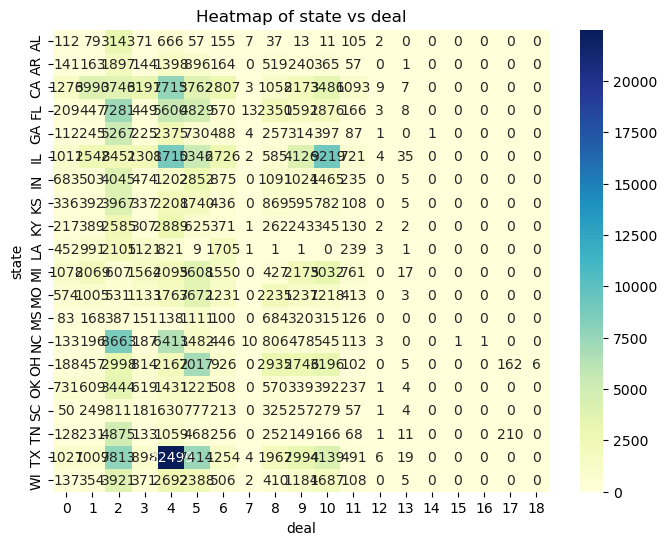

In [89]:
plot_heatmap(df,"state","deal")

In [12]:
df_copy = df.copy()
df_copy.drop("major_city", axis=1 ,inplace=True)

In [13]:
# One-hot encode the 'technology', 'state', and 'major_city' columns
encoded_cols = pd.get_dummies(df_copy[['technology', 'state']], dtype='uint8')

# Merge the encoded columns with the original DataFrame copy
df_merged = pd.concat([df_copy, encoded_cols], axis=1)

# Drop the original 'technology', 'state', and 'major_city' columns
df_merged.drop(['technology', 'state'], axis=1, inplace=True)

print(df_merged.columns)

Index(['lat', 'lon', 'race_perc_non_white', 'ppl_per_sq_mile', 'n_providers',
       'internet_perc_broadband', 'median_household_income',
       'city_household_income', 'deal', 'technology_Fiber',
       'technology_Not Fiber', 'state_AL', 'state_AR', 'state_CA', 'state_FL',
       'state_GA', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MI', 'state_MO', 'state_MS', 'state_NC', 'state_OH', 'state_OK',
       'state_SC', 'state_TN', 'state_TX', 'state_WI'],
      dtype='object')


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_scaler = MinMaxScaler()

columns_to_scale = ['lat','lon','median_household_income','city_household_income']
df_merged[columns_to_scale] = min_scaler.fit_transform(df[columns_to_scale])

In [16]:
df_merged_copy = df_merged.copy()

In [17]:
y = df_merged['deal'].values

# Create X containing everything else except 'deal'
X = df_merged.drop('deal', axis=1).values

print("X array:")
print(X)
print("\ny array:")
print(y)

X array:
[[0.38092285 0.82476639 0.47505938 ... 0.         0.         0.        ]
 [0.38109753 0.82475774 0.47505938 ... 0.         0.         0.        ]
 [0.38101996 0.82479025 0.47505938 ... 0.         0.         0.        ]
 ...
 [0.98818259 0.78848011 0.14503817 ... 0.         0.         1.        ]
 [0.98832745 0.78837171 0.14503817 ... 0.         0.         1.        ]
 [0.98810283 0.78834706 0.14503817 ... 0.         0.         1.        ]]

y array:
[0 1 0 ... 4 5 4]


In [ ]:
print(df_merged.head())

In [18]:
from sklearn.model_selection import train_test_split

# Assuming you have your X (features) and y (target) data ready
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data (X_temp and y_temp) into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Multi Layer Perceptron

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(np.unique(y_train))
model = MLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [25]:
# Define your training function
def train_model(model, criterion, optimizer, train_loader, valid_loader, num_epochs):
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()

        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_accuracy = correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Validation
        model.eval()
        running_loss_valid = 0.0
        correct_valid = 0
        total_valid = 0
        with torch.no_grad():
            for inputs_valid, targets_valid in valid_loader:
                outputs_valid = model(inputs_valid)
                loss_valid = criterion(outputs_valid, targets_valid)
                running_loss_valid += loss_valid.item()

                _, predicted_valid = torch.max(outputs_valid.data, 1)
                total_valid += targets_valid.size(0)
                correct_valid += (predicted_valid == targets_valid).sum().item()

        epoch_valid_loss = running_loss_valid / len(valid_loader)
        epoch_valid_accuracy = correct_valid / total_valid
        valid_losses.append(epoch_valid_loss)
        valid_accuracies.append(epoch_valid_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}, '
              f'Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {epoch_valid_accuracy:.4f}')

    return train_accuracies, valid_accuracies

In [26]:
num_epochs = 100
ta, va = train_model(model, criterion, optimizer, train_loader,val_loader, num_epochs)

Epoch 1/100, Train Loss: 4.9592, Train Accuracy: 0.3078, Validation Loss: 2.8390, Validation Accuracy: 0.3499
Epoch 2/100, Train Loss: 2.8116, Train Accuracy: 0.3850, Validation Loss: 1.6535, Validation Accuracy: 0.4321
Epoch 3/100, Train Loss: 2.2599, Train Accuracy: 0.4065, Validation Loss: 1.6699, Validation Accuracy: 0.4300
Epoch 4/100, Train Loss: 1.8683, Train Accuracy: 0.4237, Validation Loss: 1.8883, Validation Accuracy: 0.4005
Epoch 5/100, Train Loss: 1.6300, Train Accuracy: 0.4374, Validation Loss: 1.9517, Validation Accuracy: 0.3867
Epoch 6/100, Train Loss: 1.4718, Train Accuracy: 0.4513, Validation Loss: 1.3921, Validation Accuracy: 0.4421
Epoch 7/100, Train Loss: 1.4036, Train Accuracy: 0.4544, Validation Loss: 1.3912, Validation Accuracy: 0.4276
Epoch 8/100, Train Loss: 1.3822, Train Accuracy: 0.4562, Validation Loss: 1.3586, Validation Accuracy: 0.4618
Epoch 9/100, Train Loss: 1.3864, Train Accuracy: 0.4557, Validation Loss: 1.4036, Validation Accuracy: 0.4512
Epoch 10/1

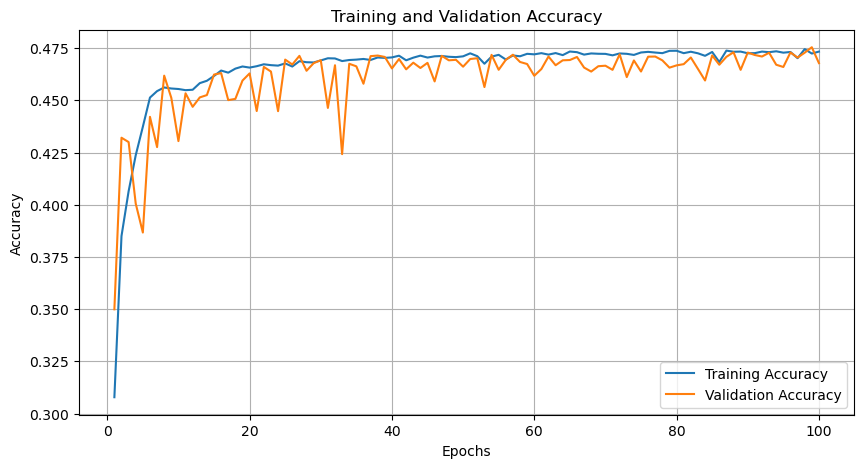

In [27]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), ta, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), va, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the classifier on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Optionally, evaluate the classifier on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.7431216717766661
Test Accuracy: 0.742622587086754


## SVM

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_val, X_test, y_train, y_val, y_test

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm.predict(X_val)

# Evaluate the classifier on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Optionally, evaluate the classifier on the test set
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Testing